In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from tensorflow.keras.datasets import mnist

In [117]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [118]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [61]:
x_train.shape

(60000, 28, 28)

In [62]:
single_image = x_train[0]

In [63]:
#single_image

In [64]:
%matplotlib inline

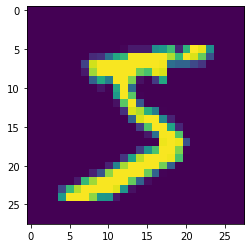

In [65]:
plt.imshow(single_image)

In [66]:
## Pre Processing

In [67]:
## Label..
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [137]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [69]:
from tensorflow.keras.utils import to_categorical

In [70]:
y_example = to_categorical(y_train)

In [71]:
y_example.shape

(60000, 10)

In [72]:
#y_example

In [73]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [74]:
y_cat_train = to_categorical(y_train,10)

In [75]:
y_cat_test = to_categorical(y_test,10)

In [76]:
#X data normalize

In [77]:
single_image.shape

(28, 28)

In [78]:
single_image.max()

255

In [79]:
x_train = x_train/255
y_test = x_test/255

In [80]:
scaled_single = x_train[0]

In [81]:
#scaled_single.shape

In [82]:
scaled_single.max()

1.0

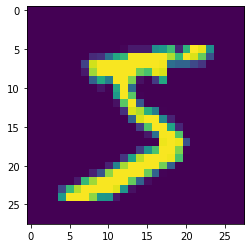

In [83]:
plt.imshow(scaled_single)

In [84]:
x_test.shape

(10000, 28, 28)

In [85]:
x_train.shape

(60000, 28, 28)

In [86]:
x_train = x_train.reshape(60000,28,28,1)

In [87]:
x_test = x_test.reshape(10000,28,28,1)

In [88]:
x_test.shape

(10000, 28, 28, 1)

In [89]:
## Training Model

In [90]:
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten
from tensorflow.keras.models import Sequential

In [91]:
28*28

784

In [92]:
model = Sequential()


## Convlutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)))

## Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

## Flattening image from 28,28 to 784

model.add(Flatten())

## Hidden Layer

model.add(Dense(128,activation='relu'))

## Hidden Layer
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [94]:
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [96]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.1439 - accuracy: 0.9572 - val_loss: 19.9728 - val_accuracy: 0.9632
Epoch 2/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0490 - accuracy: 0.9852 - val_loss: 40.8049 - val_accuracy: 0.9365
Epoch 3/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0315 - accuracy: 0.9901 - val_loss: 17.5211 - val_accuracy: 0.9756
Epoch 4/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0214 - accuracy: 0.9932 - val_loss: 18.6683 - val_accuracy: 0.9755
Epoch 5/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0143 - accuracy: 0.9952 - val_loss: 35.6168 - val_accuracy: 0.9616


In [97]:
model.metrics_names

['loss', 'accuracy']

In [98]:
losses = pd.DataFrame(model.history.history)


In [99]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.143854,0.957233,19.972825,0.9632
1,0.049012,0.985167,40.804919,0.9365
2,0.031530,0.990050,17.521132,0.9756
3,0.021377,0.993167,18.668345,0.9755
4,0.014266,0.995233,35.616846,0.9616


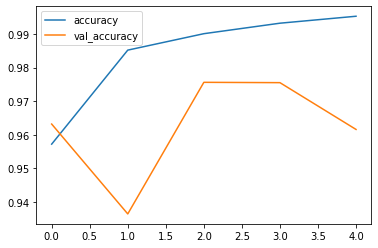

In [100]:
losses[['accuracy','val_accuracy']].plot()

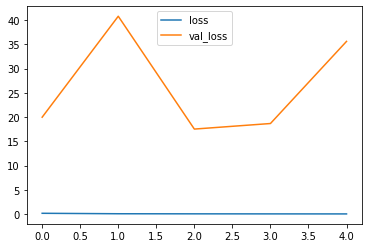

In [101]:
losses[['loss','val_loss']].plot()

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

In [103]:
predictions = model.predict_classes(x_test)

In [139]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [104]:
y_cat_test.shape

(10000, 10)

In [105]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [106]:
predictions[0]

7

In [138]:
#y_test

In [134]:
my_number = x_test[4001]

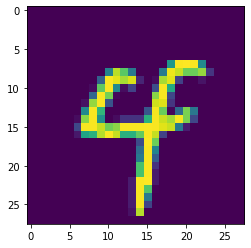

In [135]:
plt.imshow(my_number.reshape(28,28))

In [136]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([4])

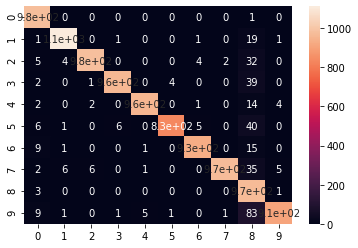

In [120]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [121]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.99      0.95      0.97      1032
           3       0.99      0.95      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.93      0.96       892
           6       0.99      0.97      0.98       958
           7       1.00      0.95      0.97      1028
           8       0.78      1.00      0.87       974
           9       0.99      0.90      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000

